In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy.random import randint 

Matplotlib is building the font cache; this may take a moment.


## Data Pendapatan

In [10]:
Data_pendapatan=pd.read_csv('Regresi Pendapatan.csv')
print("baris",len(Data_pendapatan),"kolom",len(Data_pendapatan.columns))
Data_pendapatan

baris 12 kolom 4


,Bulan,Pendapatan,x,y
0,Januari,63880000,1,63880000
1,Febuari,71920000,2,71920000
2,Maret,57040000,3,57040000
3,April,67000000,4,67000000
4,Mei,57720000,5,57720000
5,Juni,65960000,6,65960000
6,Juli,55400000,7,55400000
7,Agustus,58920000,8,58920000
8,September,61360000,9,61360000
9,Oktober,63960000,10,63960000


In [11]:
Pendapatan_bulanan = Data_pendapatan[['x','y']]
print(Pendapatan_bulanan)

     x         y
0    1  63880000
1    2  71920000
2    3  57040000
3    4  67000000
4    5  57720000
5    6  65960000
6    7  55400000
7    8  58920000
8    9  61360000
9   10  63960000
10  11  69320000
11  12  70720000


In [12]:
# Define a size for your train set 
train_size = int(0.8 * len(Pendapatan_bulanan))

# Split your dataset 
Pendapatan_bulanan.to_numpy().tolist()
Pendapatan_dataset= Pendapatan_bulanan.to_numpy().tolist()
print("Data Set =",Pendapatan_dataset)
train_set = Pendapatan_dataset[:train_size]
test_set = Pendapatan_dataset[train_size:]

print("Train Data Set =",train_set)
print("Test Data Set =",test_set)

Data Set = [[1, 63880000], [2, 71920000], [3, 57040000], [4, 67000000], [5, 57720000], [6, 65960000], [7, 55400000], [8, 58920000], [9, 61360000], [10, 63960000], [11, 69320000], [12, 70720000]]
Train Data Set = [[1, 63880000], [2, 71920000], [3, 57040000], [4, 67000000], [5, 57720000], [6, 65960000], [7, 55400000], [8, 58920000], [9, 61360000]]
Test Data Set = [[10, 63960000], [11, 69320000], [12, 70720000]]


In [13]:
# Menghitung rataan
# catatan: values dalam list
def mean(values):
    return float(sum(values)/len(values))

In [14]:
# menghitung variance
# catatan: values dalam bentuk list
def variance(values, mu):
    return sum([(x-mu)**2 for x in values])

In [15]:
def covariance(x, y, mean_x, mean_y):
    out = 0.0
    for i in range(len(x)):
        out += (x[i] - mean_x) * (y[i] - mean_y)
    return out

In [16]:
def coefficients(Pendapatan_dataset):
    # mencari koefisien b0 dan b1
    # catatan: dataset berbentuk pair x dan y dalam list
    # output : list[b0,b1]
    
    x = [pasangan[0] for pasangan in Pendapatan_dataset]
    y = [pasangan[1] for pasangan in Pendapatan_dataset]
    mean_x = mean(x)
    mean_y = mean(y)
    b1 = covariance(x, y, mean_x, mean_y)/variance(x,mean_x)
    b0 = mean_y - b1*mean_x
    return [b0, b1]

In [17]:
def linear_regression(train, test):
    # test : list
    # train : list
    
    prediction = list()
    b0, b1 = coefficients(train)
    print(f'b0 = {b0}')
    print(f'b1 = {b1}')
    for nilai in test:
        y_hat = b0 + b1*nilai[0]
        prediction.append(y_hat)
        
    return prediction

In [18]:
test = [[2,None],[9,None]]

In [20]:
linear_regression(Pendapatan_dataset, test)

b0 = 62120000.0
b1 = 227692.3076923077


[62575384.615384616, 64169230.76923077]

In [21]:
# loss function : mean squared error
def mse(actual, predicted):
    # actual : list
    # predicted : list
    # out: mean squared error : float 
    
    sum_error = 0
    for i in range(len(actual)):
        error = (predicted[i] - actual[i])**2
        sum_error += error
    mean_se = float(sum_error/len(actual))
    return mean_se    

In [22]:
# menghitung error (evaluation)
def evaluate_model(Pendapatan_dataset,model):
    test_set = Pendapatan_dataset 
    y_hat = model(Pendapatan_dataset, test_set)
    y = [angka[1] for angka in Pendapatan_dataset]
    return mse(y, y_hat), y_hat

In [23]:
e, y_hat = evaluate_model(Pendapatan_dataset, linear_regression)
print(f'mse = {e}')
print(f'y_hat = {y_hat}')

b0 = 62120000.0
b1 = 227692.3076923077
mse = 27860594871794.863
y_hat = [62347692.307692304, 62575384.615384616, 62803076.92307692, 63030769.23076923, 63258461.538461536, 63486153.84615385, 63713846.15384615, 63941538.461538464, 64169230.76923077, 64396923.07692308, 64624615.384615384, 64852307.692307696]


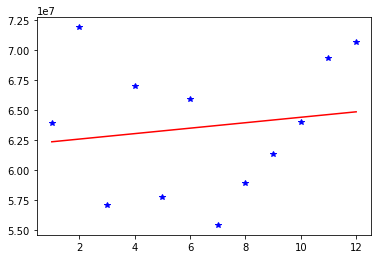

In [24]:
x = [angka[0] for angka in Pendapatan_dataset]
y = [angka[1] for angka in Pendapatan_dataset]

plt.plot(x,y,'b*')
plt.plot(x,y_hat,'r-')

# Data Produksi

In [25]:
Data_produksi=pd.read_csv('Regresi Biaya Produksi.csv')
print("baris",len(Data_produksi),"kolom",len(Data_produksi.columns))
Data_produksi

baris 12 kolom 4


,Bulan,Biaya Produks,x,y
0,Januari,31940000,1,31940000
1,Febuari,35960000,2,35960000
2,Maret,28520000,3,28520000
3,April,33500000,4,33500000
4,Mei,28860000,5,28860000
5,Juni,32980000,6,32980000
6,Juli,27700000,7,27700000
7,Agustus,29460000,8,29460000
8,September,30680000,9,30680000
9,Oktober,31980000,10,31980000


In [26]:
produksi_bulanan = Data_produksi[['x','y']]
print(produksi_bulanan)

     x         y
0    1  31940000
1    2  35960000
2    3  28520000
3    4  33500000
4    5  28860000
5    6  32980000
6    7  27700000
7    8  29460000
8    9  30680000
9   10  31980000
10  11  34660000
11  12  35360000


In [27]:
# Define a size for your train set 
train_size = int(0.8 * len(produksi_bulanan))

# Split your dataset 
produksi_bulanan.to_numpy().tolist()
produksi_dataset= produksi_bulanan.to_numpy().tolist()
print("Data Set =",produksi_dataset)
train_set = produksi_dataset[:train_size]
test_set = produksi_dataset[train_size:]

print("Train Data Set =",train_set)
print("Test Data Set =",test_set)

Data Set = [[1, 31940000], [2, 35960000], [3, 28520000], [4, 33500000], [5, 28860000], [6, 32980000], [7, 27700000], [8, 29460000], [9, 30680000], [10, 31980000], [11, 34660000], [12, 35360000]]
Train Data Set = [[1, 31940000], [2, 35960000], [3, 28520000], [4, 33500000], [5, 28860000], [6, 32980000], [7, 27700000], [8, 29460000], [9, 30680000]]
Test Data Set = [[10, 31980000], [11, 34660000], [12, 35360000]]


In [28]:
def coefficients(produksi_dataset):
    # mencari koefisien b0 dan b1
    # catatan: dataset berbentuk pair x dan y dalam list
    # output : list[b0,b1]
    
    x = [pasangan[0] for pasangan in produksi_dataset]
    y = [pasangan[1] for pasangan in produksi_dataset]
    mean_x = mean(x)
    mean_y = mean(y)
    b1 = covariance(x, y, mean_x, mean_y)/variance(x,mean_x)
    b0 = mean_y - b1*mean_x
    return [b0, b1]

In [29]:
test = [[2,None],[9,None]]

In [30]:
linear_regression(produksi_dataset, test)

b0 = 31060000.0
b1 = 113846.15384615384


[31287692.307692308, 32084615.384615384]

In [31]:
# menghitung error (evaluation)
def evaluate_model(produksi_dataset,model):
    test_set = produksi_dataset 
    y_hat = model(produksi_dataset, test_set)
    y = [angka[1] for angka in produksi_dataset]
    return mse(y, y_hat), y_hat

In [32]:
e, y_hat = evaluate_model(produksi_dataset, linear_regression)
print(f'mse = {e}')
print(f'y_hat = {y_hat}')

b0 = 31060000.0
b1 = 113846.15384615384
mse = 6965148717948.716
y_hat = [31173846.153846152, 31287692.307692308, 31401538.46153846, 31515384.615384616, 31629230.769230768, 31743076.923076924, 31856923.076923076, 31970769.230769232, 32084615.384615384, 32198461.53846154, 32312307.692307692, 32426153.846153848]


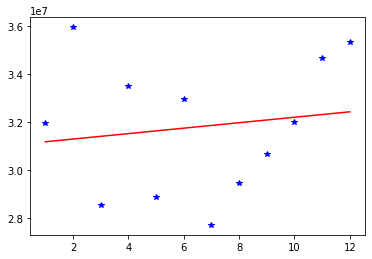

In [33]:
x = [angka[0] for angka in produksi_dataset]
y = [angka[1] for angka in produksi_dataset]

plt.plot(x,y,'b*')
plt.plot(x,y_hat,'r-')

# Data Penjualan Minuman

In [34]:
Data_Minuman=pd.read_csv('Regresis Penjualan Minuman.csv')
print("baris",len(Data_Minuman),"kolom",len(Data_Minuman.columns))
Data_Minuman

baris 12 kolom 4


,Bulan,Minuman,x,y
0,Januari,687,1,687
1,Febuari,863,2,863
2,Maret,699,3,699
3,April,804,4,804
4,Mei,707,5,707
5,Juni,792,6,792
6,Juli,624,7,624
7,Agustus,707,8,707
8,September,752,9,752
9,Oktober,784,10,784


In [35]:
penjulan_minuman_bulanan = Data_Minuman[['x','y']]
print(penjulan_minuman_bulanan)

     x    y
0    1  687
1    2  863
2    3  699
3    4  804
4    5  707
5    6  792
6    7  624
7    8  707
8    9  752
9   10  784
10  11  850
11  12  796


In [36]:
# Define a size for your train set 
train_size = int(0.8 * len(penjulan_minuman_bulanan))

# Split your dataset 
penjulan_minuman_bulanan.to_numpy().tolist()
minuman_dataset= penjulan_minuman_bulanan.to_numpy().tolist()
print("Data Set =",minuman_dataset)
train_set = minuman_dataset[:train_size]
test_set = minuman_dataset[train_size:]

print("Train Data Set =",train_set)
print("Test Data Set =",test_set)

Data Set = [[1, 687], [2, 863], [3, 699], [4, 804], [5, 707], [6, 792], [7, 624], [8, 707], [9, 752], [10, 784], [11, 850], [12, 796]]
Train Data Set = [[1, 687], [2, 863], [3, 699], [4, 804], [5, 707], [6, 792], [7, 624], [8, 707], [9, 752]]
Test Data Set = [[10, 784], [11, 850], [12, 796]]


In [37]:
def coefficients(minuman_dataset):
    # mencari koefisien b0 dan b1
    # catatan: dataset berbentuk pair x dan y dalam list
    # output : list[b0,b1]
    
    x = [pasangan[0] for pasangan in minuman_dataset]
    y = [pasangan[1] for pasangan in minuman_dataset]
    mean_x = mean(x)
    mean_y = mean(y)
    b1 = covariance(x, y, mean_x, mean_y)/variance(x,mean_x)
    b0 = mean_y - b1*mean_x
    return [b0, b1]

In [38]:
test = [[2,None],[9,None]]

In [39]:
linear_regression(minuman_dataset, test)

b0 = 727.030303030303
b1 = 4.3671328671328675


[735.7645687645687, 766.3344988344988]

In [40]:
# menghitung error (evaluation)
def evaluate_model(minuman_dataset,model):
    test_set = minuman_dataset 
    y_hat = model(minuman_dataset, test_set)
    y = [angka[1] for angka in minuman_dataset]
    return mse(y, y_hat), y_hat

In [41]:
e, y_hat = evaluate_model(minuman_dataset, linear_regression)
print(f'mse = {e}')
print(f'y_hat = {y_hat}')

b0 = 727.030303030303
b1 = 4.3671328671328675
mse = 4482.470182595181
y_hat = [731.3974358974359, 735.7645687645687, 740.1317016317016, 744.4988344988345, 748.8659673659673, 753.2331002331002, 757.600233100233, 761.9673659673659, 766.3344988344988, 770.7016317016316, 775.0687645687645, 779.4358974358975]


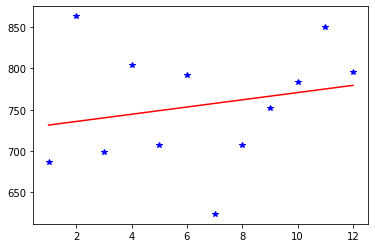

In [42]:
x = [angka[0] for angka in minuman_dataset]
y = [angka[1] for angka in minuman_dataset]

plt.plot(x,y,'b*')
plt.plot(x,y_hat,'r-')

# Data Penjualan Makanan

In [44]:
Data_Makanan=pd.read_csv('Regresis Penjualan Makanan.csv')
print("baris",len(Data_Makanan),"kolom",len(Data_Makanan.columns))
Data_Makanan

baris 12 kolom 4


,Bulan,Makanan,x,y
0,Januari,910,1,910
1,Febuari,935,2,935
2,Maret,727,3,727
3,April,871,4,871
4,Mei,736,5,736
5,Juni,857,6,857
6,Juli,761,7,761
7,Agustus,766,8,766
8,September,782,9,782
9,Oktober,815,10,815


In [45]:
penjulan_makanan_bulanan = Data_Makanan[['x','y']]
print(penjulan_makanan_bulanan )

     x    y
0    1  910
1    2  935
2    3  727
3    4  871
4    5  736
5    6  857
6    7  761
7    8  766
8    9  782
9   10  815
10  11  883
11  12  972


In [46]:
# Define a size for your train set 
train_size = int(0.8 * len(penjulan_makanan_bulanan))

# Split your dataset 
penjulan_makanan_bulanan.to_numpy().tolist()
makanan_dataset= penjulan_makanan_bulanan.to_numpy().tolist()
print("Data Set =",makanan_dataset)
train_set = makanan_dataset[:train_size]
test_set = makanan_dataset[train_size:]

print("Train Data Set =",train_set)
print("Test Data Set =",test_set)

Data Set = [[1, 910], [2, 935], [3, 727], [4, 871], [5, 736], [6, 857], [7, 761], [8, 766], [9, 782], [10, 815], [11, 883], [12, 972]]
Train Data Set = [[1, 910], [2, 935], [3, 727], [4, 871], [5, 736], [6, 857], [7, 761], [8, 766], [9, 782]]
Test Data Set = [[10, 815], [11, 883], [12, 972]]


In [47]:
def coefficients(makanan_dataset):
    # mencari koefisien b0 dan b1
    # catatan: dataset berbentuk pair x dan y dalam list
    # output : list[b0,b1]
    
    x = [pasangan[0] for pasangan in makanan_dataset]
    y = [pasangan[1] for pasangan in makanan_dataset]
    mean_x = mean(x)
    mean_y = mean(y)
    b1 = covariance(x, y, mean_x, mean_y)/variance(x,mean_x)
    b0 = mean_y - b1*mean_x
    return [b0, b1]

In [48]:
test = [[2,None],[9,None]]

In [49]:
linear_regression(makanan_dataset, test)

b0 = 825.969696969697
b1 = 1.3251748251748252


[828.6200466200467, 837.8962703962704]

In [50]:
# menghitung error (evaluation)
def evaluate_model(makanan_dataset,model):
    test_set = makanan_dataset 
    y_hat = model(makanan_dataset, test_set)
    y = [angka[1] for angka in makanan_dataset]
    return mse(y, y_hat), y_hat

In [51]:
e, y_hat = evaluate_model(makanan_dataset, linear_regression)
print(f'mse = {e}')
print(f'y_hat = {y_hat}')

b0 = 825.969696969697
b1 = 1.3251748251748252
mse = 6094.64966977467
y_hat = [827.2948717948718, 828.6200466200467, 829.9452214452215, 831.2703962703963, 832.5955710955711, 833.920745920746, 835.2459207459208, 836.5710955710956, 837.8962703962704, 839.2214452214453, 840.5466200466201, 841.8717948717949]


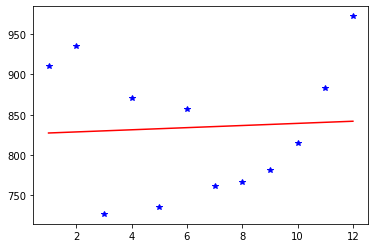

In [52]:
x = [angka[0] for angka in makanan_dataset]
y = [angka[1] for angka in makanan_dataset]

plt.plot(x,y,'b*')
plt.plot(x,y_hat,'r-')